# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [ ]:
a = np.array([1, 3, 2, 4])

In [ ]:
a

In [ ]:
type(a)

In [ ]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

In [ ]:
A[0]

In [ ]:
C[2, 0]

In [ ]:
B[:, 0]

### Elementwise operations

In [ ]:
3 * A

In [ ]:
A + A

In [ ]:
A * A

In [ ]:
A / A

In [ ]:
A - A

In [ ]:
A + B

In [ ]:
A * B

### Dot product

In [ ]:
A.shape

In [ ]:
B.shape

In [ ]:
A.dot(B)

In [ ]:
np.dot(A, B)

In [ ]:
B.dot(A)

In [ ]:
C.shape

In [ ]:
A.shape

In [ ]:
C.dot(A)

In [ ]:
A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [3]:
df = pd.read_csv('../data/banknotes.csv')

In [4]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [6]:
import seaborn as sns

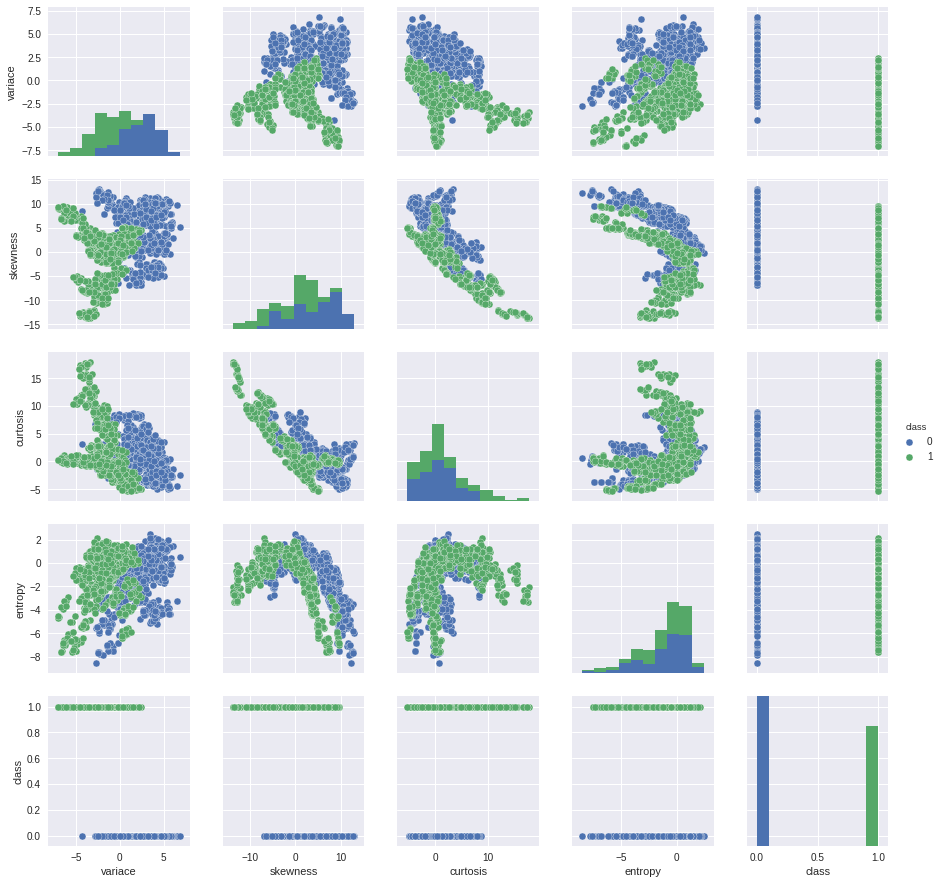

In [7]:
sns.pairplot(df, hue="class")

#### Baseline model

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [9]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [10]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99344978,  0.98249453,  0.99781182])

### Logistic Regression Model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [12]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [13]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 0.4777 - acc: 0.7771     
Epoch 2/10
960/960 [==============================] - 0s - loss: 0.4643 - acc: 0.7833     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.4518 - acc: 0.7937     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.4403 - acc: 0.8052     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.4296 - acc: 0.8167     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.4196 - acc: 0.8271     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.4102 - acc: 0.8302     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.4014 - acc: 0.8354     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.3930 - acc: 0.8406     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [14]:
historydf = pd.DataFrame(history.history, index=history.epoch)

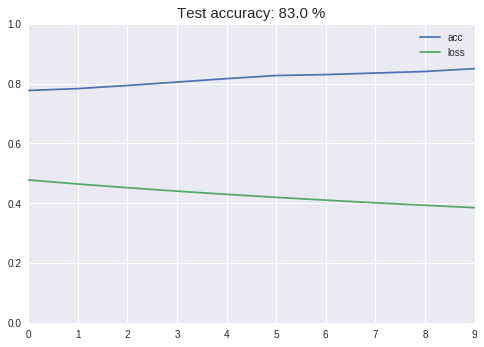

In [15]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [16]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [17]:
historydf = pd.concat(dflist, axis=1)

In [18]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.590625,0.707239,0.617708,0.658735,0.841667,0.425632,0.919792,0.276317
1,0.682292,0.611786,0.871875,0.402077,0.939583,0.239059,0.968750,0.120434
2,0.743750,0.549887,0.922917,0.312072,0.955208,0.197423,0.976042,0.092083
3,0.764583,0.506707,0.934375,0.263060,0.961458,0.171103,0.975000,0.078407
4,0.784375,0.474580,0.947917,0.230447,0.964583,0.152115,0.979167,0.070175
5,0.802083,0.449340,0.953125,0.206753,0.967708,0.137854,0.980208,0.064584
6,0.819792,0.428500,0.955208,0.188547,0.968750,0.126914,0.980208,0.060106
7,0.829167,0.410739,0.956250,0.174111,0.969792,0.118134,0.981250,0.057136
8,0.832292,0.395160,0.958333,0.162282,0.969792,0.110834,0.981250,0.054415
9,0.843750,0.381242,0.964583,0.152517,0.971875,0.104856,0.981250,0.052225


In [19]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [20]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.590625  0.707239  0.617708  0.658735  0.841667  0.425632   
1              0.682292  0.611786  0.871875  0.402077  0.939583  0.239059   
2              0.743750  0.549887  0.922917  0.312072  0.955208  0.197423   
3              0.764583  0.506707  0.934375  0.263060  0.961458  0.171103   
4              0.784375  0.474580  0.947917  0.230447  0.964583  0.152115   
5              0.802083  0.449340  0.953125  0.206753  0.967708  0.137854   
6              0.819792  0.428500  0.955208  0.188547  0.968750  0.126914   
7              0.829167  0.410739  0.956250  0.174111  0.969792  0.118134   
8              0.832292  0.395160  0.958333  0.162282  0.969792  0.110834   
9              0.843750  0.381242  0.964583  0.152517  0.971875  0.104856   

learning_rate      0.50            
metric              acc      loss  
0              0.919792  0.276317  
1              0.968750  0.120434  
2              0.976042  0.092083  
3              0.975000  0.078407  
4              0.979167  0.070175  
5              0.980208  0.064584  
6              0.980208  0.060106  
7              0.981250  0.057136  
8              0.981250  0.054415  
9              0.981250  0.052225

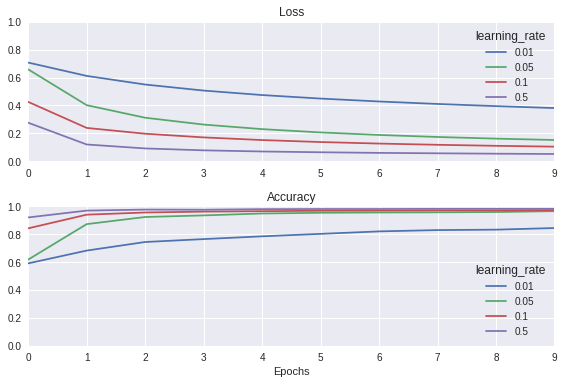

In [21]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [22]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [23]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [24]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.710417  0.602570  0.733333  0.567955  0.938542  0.352449   
1           0.819792  0.512054  0.740625  0.546018  0.937500  0.347581   
2           0.887500  0.449043  0.750000  0.526856  0.936458  0.342947   
3           0.944792  0.403816  0.755208  0.509961  0.936458  0.338524   
4           0.966667  0.370128  0.764583  0.494892  0.936458  0.334311   
5           0.970833  0.344206  0.775000  0.481175  0.936458  0.330283   
6           0.969792  0.323645  0.779167  0.468718  0.936458  0.326420   
7           0.964583  0.306877  0.782292  0.457262  0.936458  0.322712   
8           0.963542  0.292838  0.784375  0.446638  0.936458  0.319153   
9           0.963542  0.280876  0.791667  0.436719  0.936458  0.315734   

batch_size       128            
metric           acc      loss  
0           0.320833  1.204660  
1           0.332292  1.167653  
2           0.340625  1.132061  
3           0.360417  1.097531  
4           0.383333  1.064181  
5           0.397917  1.031948  
6           0.407292  1.000725  
7           0.413542  0.970705  
8           0.431250  0.942026  
9           0.445833  0.914459

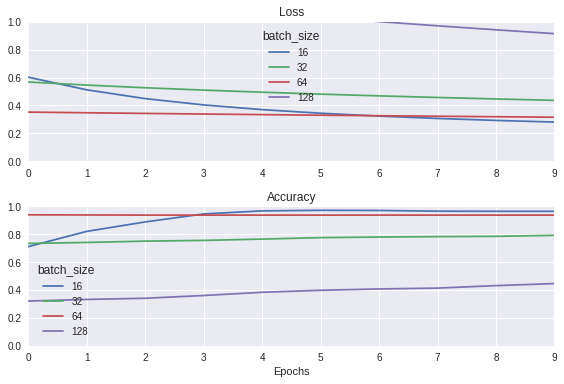

In [25]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [26]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [27]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [28]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

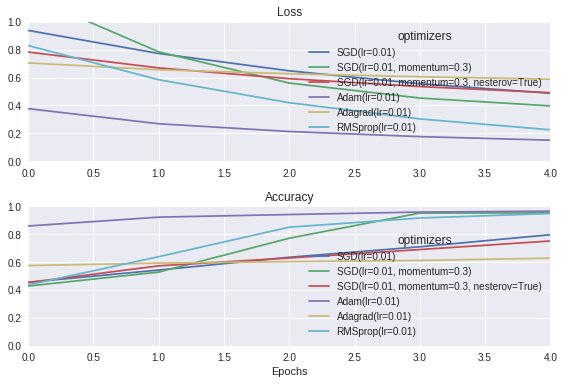

In [29]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [30]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [31]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

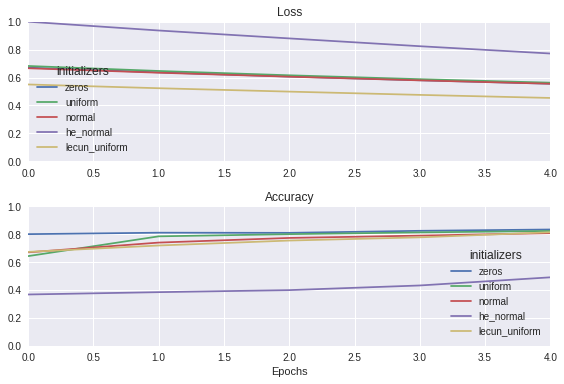

In [32]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [33]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s - loss: 0.6621 - acc: 0.6057 - val_loss: 0.6204 - val_acc: 0.6250
Epoch 2/20
672/672 [==============================] - 0s - loss: 0.5613 - acc: 0.7411 - val_loss: 0.5362 - val_acc: 0.7431
Epoch 3/20
672/672 [==============================] - 0s - loss: 0.4502 - acc: 0.8289 - val_loss: 0.3576 - val_acc: 0.8854
Epoch 4/20
672/672 [==============================] - 0s - loss: 0.2999 - acc: 0.9271 - val_loss: 0.2256 - val_acc: 0.9410
Epoch 5/20
672/672 [==============================] - 0s - loss: 0.1995 - acc: 0.9479 - val_loss: 0.1434 - val_acc: 0.9653
Epoch 6/20
672/672 [==============================] - 0s - loss: 0.1278 - acc: 0.9568 - val_loss: 0.0851 - val_acc: 0.9757
Epoch 7/20
672/672 [==============================] - 0s - loss: 0.0830 - acc: 0.9688 - val_loss: 0.0593 - val_acc: 0.9826
Epoch 8/20
672/672 [==============================] - 0s - loss: 0.0634 - acc: 0.9747 - val_l

In [34]:
result

[0.027902362298545907, 0.98786407766990292]

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.layers

In [37]:
inp = model.layers[0].input
out = model.layers[0].output

In [38]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [39]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [40]:
features_function = K.function([inp], [out])

In [41]:
features_function

In [42]:
features_function([X_test])[0].shape

(412, 2)

In [43]:
features = features_function([X_test])[0]

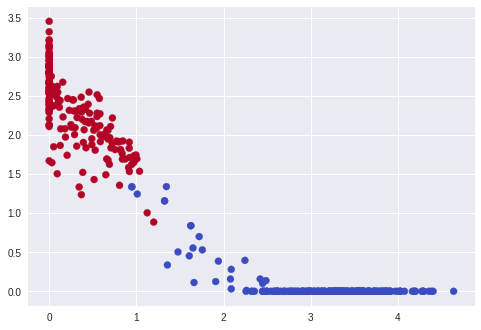

In [44]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [45]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

 32/412 [=>............................] - ETA: 0s

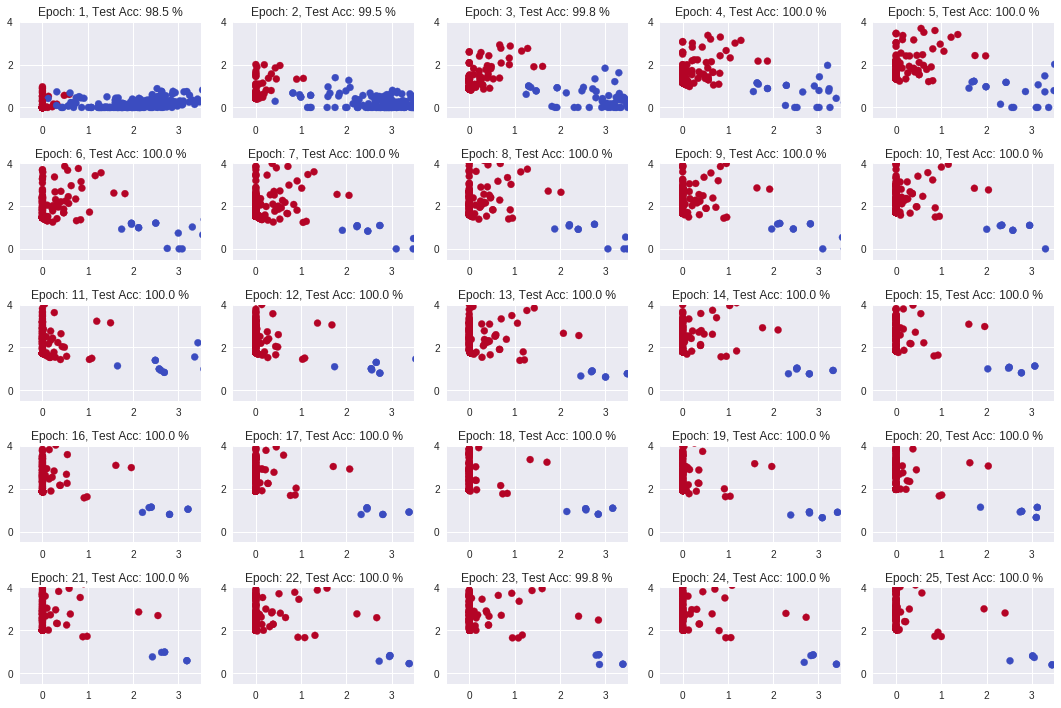

In [46]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [47]:
df = pd.read_csv('../data/wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [48]:
y = df['Class']

In [49]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [50]:
y_cat = pd.get_dummies(y)

In [51]:
y_cat.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [52]:
X = df.drop('Class', axis=1)

In [53]:
import seaborn as sns

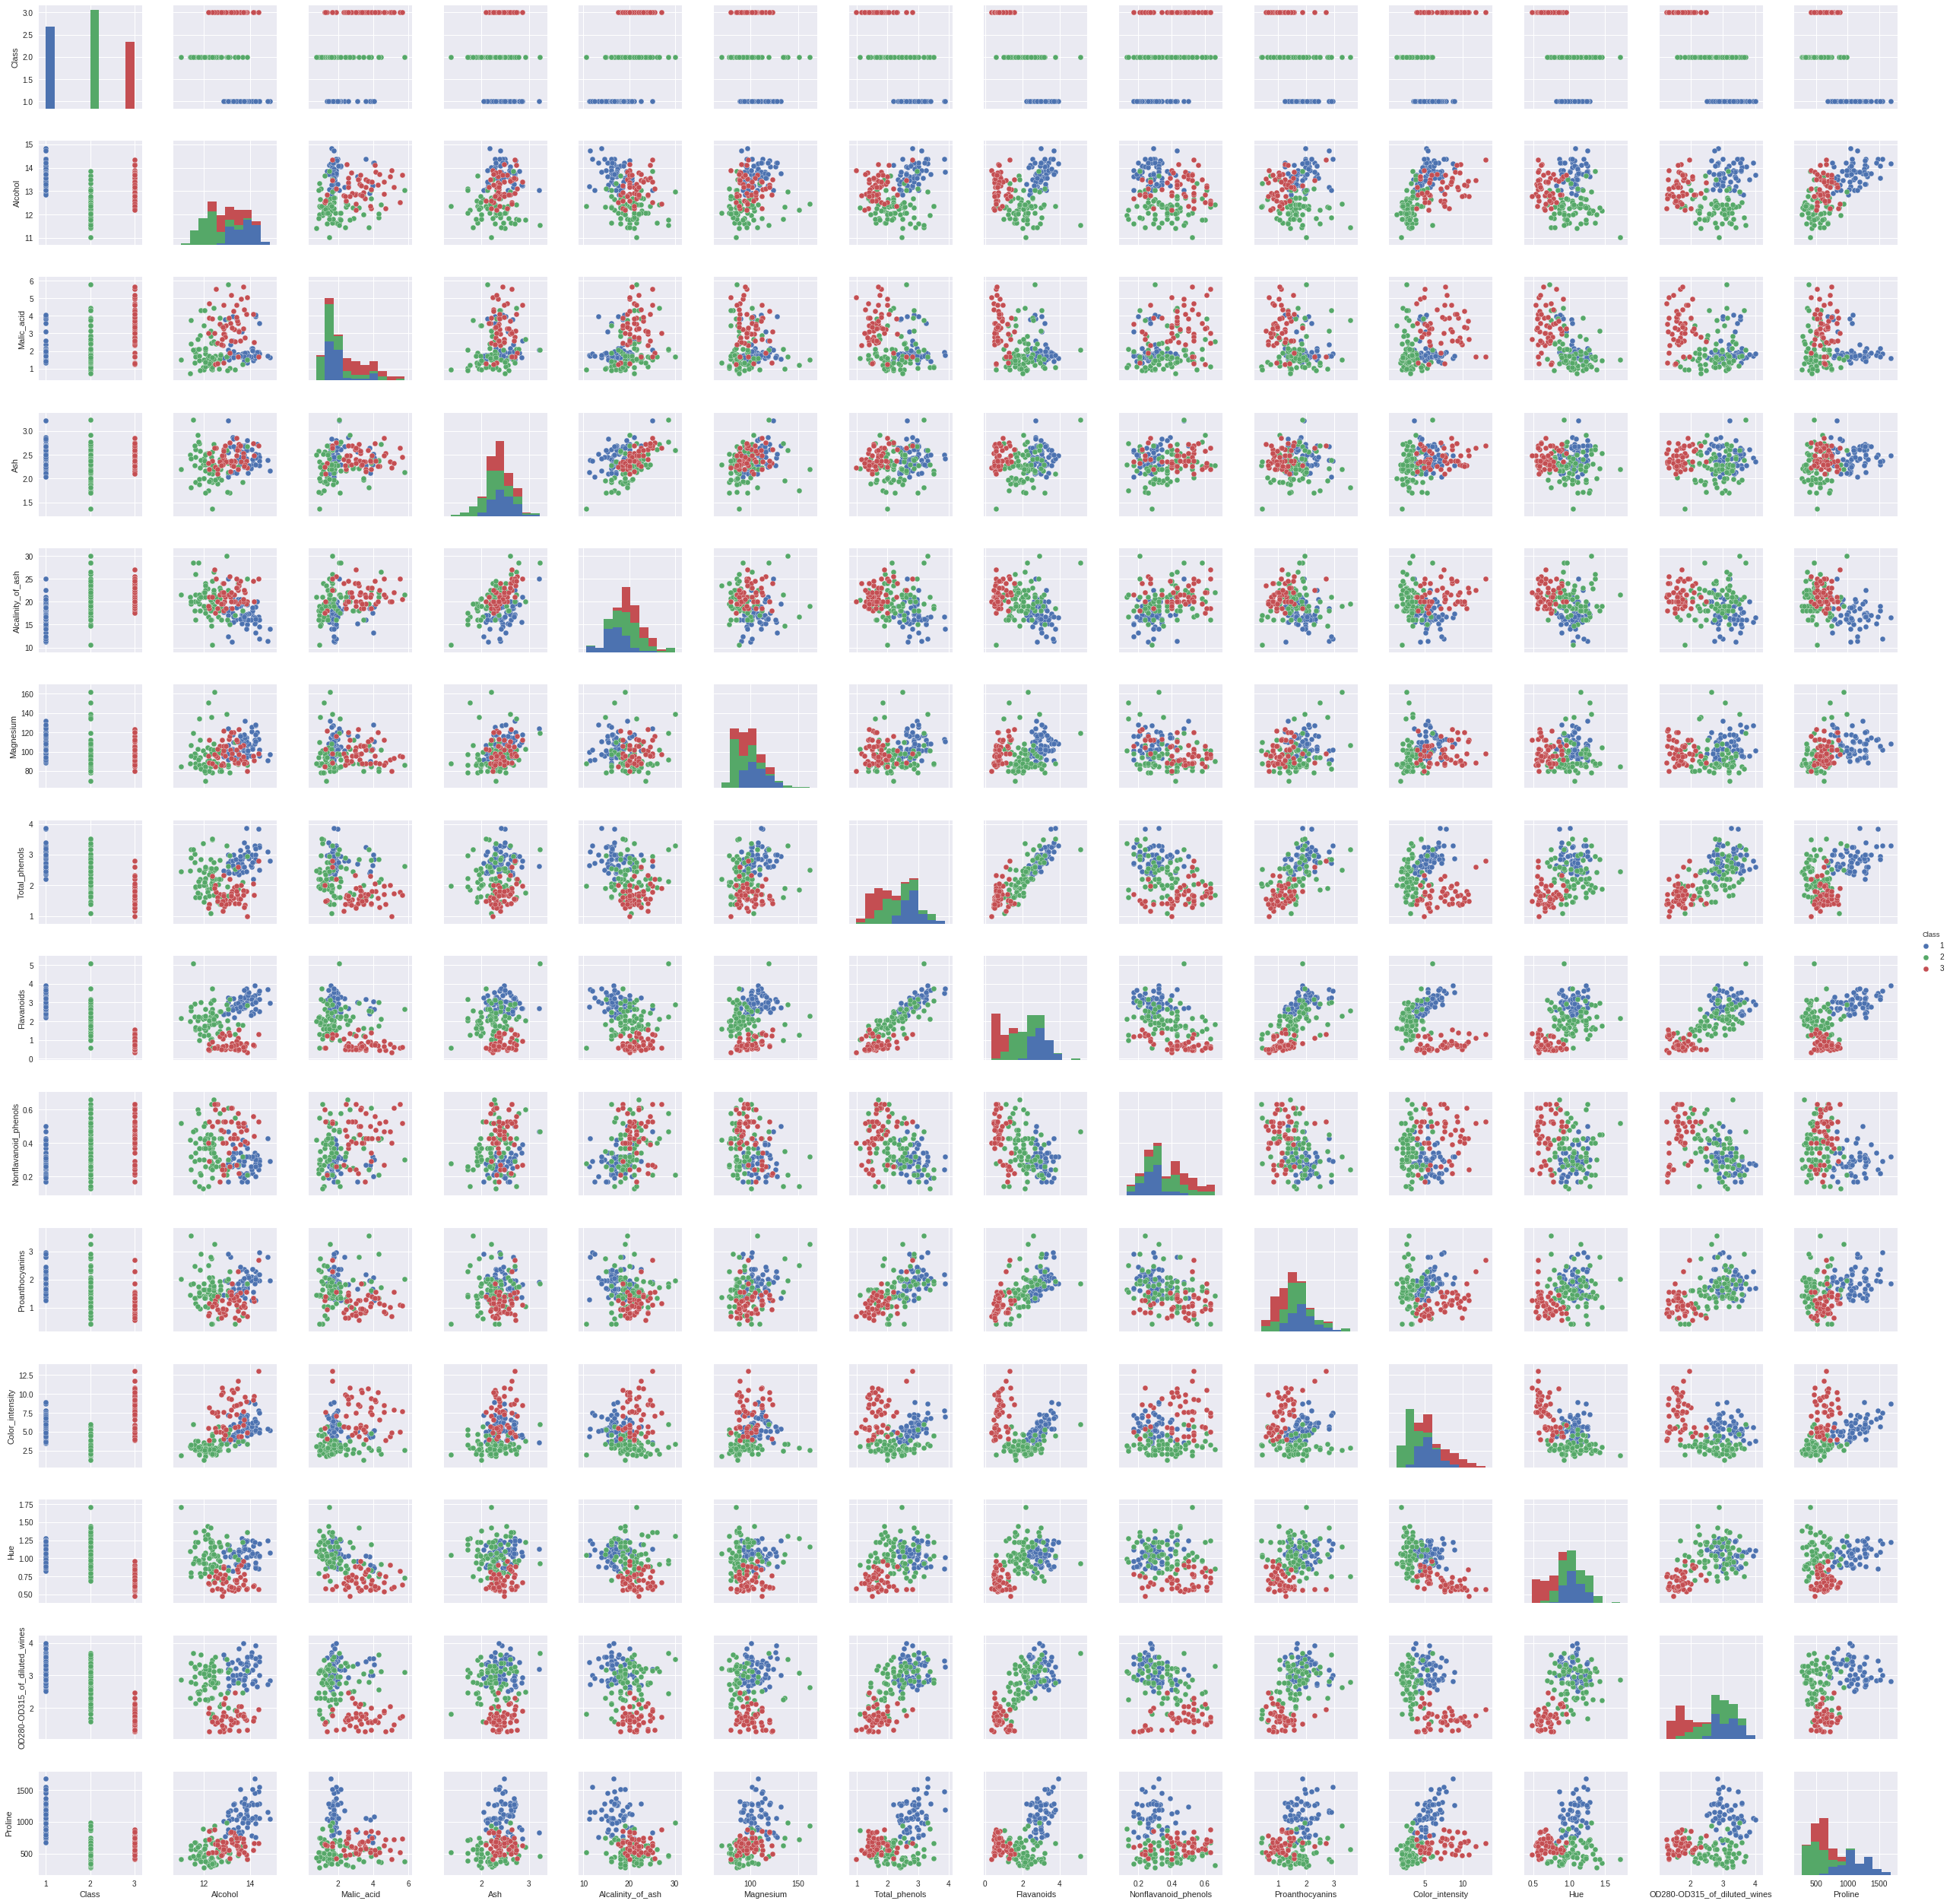

In [54]:
sns.pairplot(df, hue="Class")

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()

In [57]:
Xsc = sc.fit_transform(X)

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K

In [59]:
K.clear_session()
model = Sequential()
model.add(Dense(5, input_shape=(13,),
                kernel_initializer='he_normal',
                activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.1),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=8,
          epochs=10,
          verbose=1,
          validation_split=0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/10
142/142 [==============================] - 0s - loss: 0.2962 - acc: 0.8944 - val_loss: 0.1488 - val_acc: 0.9444
Epoch 2/10
142/142 [==============================] - 0s - loss: 0.1028 - acc: 0.9648 - val_loss: 0.0265 - val_acc: 1.0000
Epoch 3/10
142/142 [==============================] - 0s - loss: 0.0356 - acc: 0.9859 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 4/10
142/142 [==============================] - 0s - loss: 0.0256 - acc: 0.9859 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 5/10
142/142 [==============================] - 0s - loss: 0.1071 - acc: 0.9718 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 6/10
142/142 [==============================] - 0s - loss: 0.0183 - acc: 0.9930 - val_loss: 0.0277 - val_acc: 0.9722
Epoch 7/10
142/142 [==============================] - 0s - loss: 0.0725 - acc: 0.9859 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 8/10
142/142 [==============================] - 0s - loss: 0.0026 - acc: 1.0000 - val_lo

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [78]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13,),
               kernel_initializer = 'he_normal', activation='tanh'))
model.add(Dense(5, kernel_initializer = 'he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer = 'he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.5),
             'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=16,
          epochs=20,
          verbose=1)

Epoch 1/20
178/178 [==============================] - 0s - loss: 1.3531 - acc: 0.4607     
Epoch 2/20
178/178 [==============================] - 0s - loss: 0.8156 - acc: 0.6685     
Epoch 3/20
178/178 [==============================] - 0s - loss: 0.8110 - acc: 0.6404     
Epoch 4/20
178/178 [==============================] - 0s - loss: 0.5505 - acc: 0.8315     
Epoch 5/20
178/178 [==============================] - 0s - loss: 0.6997 - acc: 0.7697     
Epoch 6/20
178/178 [==============================] - 0s - loss: 0.5028 - acc: 0.8146     
Epoch 7/20
178/178 [==============================] - 0s - loss: 0.4788 - acc: 0.8596     
Epoch 8/20
178/178 [==============================] - 0s - loss: 0.3944 - acc: 0.8483     
Epoch 9/20
178/178 [==============================] - 0s - loss: 0.4318 - acc: 0.8483     
Epoch 10/20
178/178 [==============================] - 0s - loss: 0.5064 - acc: 0.8146     
Epoch 11/20
178/178 [==============================] - 0s - loss: 0.4027 - acc: 0.8820   

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [81]:
inp = model.layers[0].input
out = model.layers[0].output

In [83]:
features_function = K.function([inp], [out])

In [84]:
features = features_function([Xsc])[0]

In [85]:
features.shape

(178, 2)

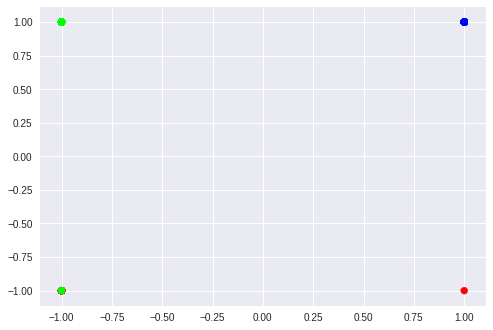

In [86]:
plt.scatter(features[:, 0], features[:, 1], c=y_cat)

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [87]:
from keras.layers import Input
from keras.models import Model

In [88]:
K.clear_session()

inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
178/178 [==============================] - 0s - loss: 0.7028 - acc: 0.7135     
Epoch 2/20
178/178 [==============================] - 0s - loss: 0.2520 - acc: 0.9607     
Epoch 3/20
178/178 [==============================] - 0s - loss: 0.1817 - acc: 0.9607     
Epoch 4/20
178/178 [==============================] - 0s - loss: 0.0910 - acc: 0.9888     
Epoch 5/20
178/178 [==============================] - 0s - loss: 0.0519 - acc: 0.9944     
Epoch 6/20
178/178 [==============================] - 0s - loss: 0.0994 - acc: 0.9775     
Epoch 7/20
178/178 [==============================] - 0s - loss: 0.0652 - acc: 0.9831     
Epoch 8/20
178/178 [==============================] - 0s - loss: 0.1209 - acc: 0.9663     
Epoch 9/20
178/178 [==============================] - 0s - loss: 0.1056 - acc: 0.9719     
Epoch 10/20
178/178 [==============================] - 0s - loss: 0.0785 - acc: 0.9831     
Epoch 11/20
178/178 [==============================] - 0s - loss: 0.0582 - acc: 0.9831   

In [89]:
features_function = K.function([inputs], [second_to_last])

In [90]:
features = features_function([Xsc])[0]

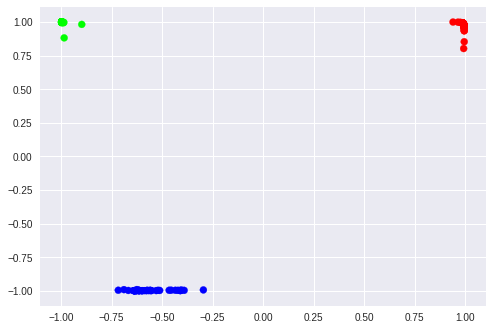

In [91]:
plt.scatter(features[:, 0], features[:, 1], c=y_cat)

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [92]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [93]:
checkpointer = ModelCheckpoint(filepath="/tmp/udemy/weights.hdf5",
                               verbose=1, save_best_only=True)

In [94]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=1, verbose=1, mode='auto')

In [95]:
tensorboard = TensorBoard(log_dir='/tmp/udemy/tensorboard/')

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(Xsc, y_cat.values,
                                                    test_size=0.3,
                                                    random_state=42)

In [98]:
K.clear_session()

inputs = Input(shape=(13,))

x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05), 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32,
          epochs=20, verbose=2,
          validation_data=(X_test, y_test),
          callbacks=[checkpointer, earlystopper, tensorboard])

Train on 124 samples, validate on 54 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 0.67558, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.8253 - acc: 0.5887 - val_loss: 0.6756 - val_acc: 0.6111
Epoch 2/20
Epoch 00001: val_loss improved from 0.67558 to 0.63851, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.6189 - acc: 0.6210 - val_loss: 0.6385 - val_acc: 0.6481
Epoch 3/20
Epoch 00002: val_loss improved from 0.63851 to 0.57401, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.6449 - acc: 0.6452 - val_loss: 0.5740 - val_acc: 0.6481
Epoch 4/20
Epoch 00003: val_loss improved from 0.57401 to 0.54033, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.5441 - acc: 0.6613 - val_loss: 0.5403 - val_acc: 0.7037
Epoch 5/20
Epoch 00004: val_loss improved from 0.54033 to 0.41755, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.4995 - acc: 0.7823 - val_loss: 0.4175 - val_acc: 0.9259
Epoch 6/20
Epoch 00005: val_loss improved from 0.41755 to 0.30985, saving model